# Assignment Task 2: Visualise Data Insights using Seaborn (15 marks)

# Sub Task 1: Data Preparation(2 marks)

* Import libraries and load data
* Change the labelling for better interpretation/ visualization understanding

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("cardiac_disease.csv")
df["cp"] = df["cp"].replace({0: "asymptomatic", 1: "atypical_angina", 2: "non-anginal pain", 3: "typical angina"})
df["sex"] = df["sex"].replace({0: "Female", 1: "Male"})
df["fbs"] = df["fbs"].replace({0: "No", 1: "Yes"})
df["exang"] = df["exang"].replace({0: "No", 1: "Yes"})
df["slope"] = df["slope"].replace({0: "downsloping", 1: "flat", 2: "upsloping"})
df["thal"] = df["thal"].replace({0: "others", 1: "normal", 2: "fixed defect", 3: "reversible_defect"})
df["target"] = df["target"].replace({1: "Disease", 0: "No disease"})
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,caa,thal,target
0,63,Male,typical angina,145,233,Yes,0,150,No,2.3,downsloping,0,normal,Disease
1,37,Male,non-anginal pain,130,250,No,1,187,No,3.5,downsloping,0,fixed defect,Disease
2,41,Female,atypical_angina,130,204,No,0,172,No,1.4,upsloping,0,fixed defect,Disease
3,56,Male,atypical_angina,120,236,No,1,178,No,0.8,upsloping,0,fixed defect,Disease
4,57,Female,asymptomatic,120,354,No,1,163,Yes,0.6,upsloping,0,fixed defect,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,Female,asymptomatic,140,241,No,1,123,Yes,0.2,flat,0,reversible_defect,No disease
299,45,Male,typical angina,110,264,No,1,132,No,1.2,flat,0,reversible_defect,No disease
300,68,Male,asymptomatic,144,193,Yes,1,141,No,3.4,flat,2,reversible_defect,No disease
301,57,Male,asymptomatic,130,131,No,1,115,Yes,1.2,flat,1,reversible_defect,No disease


# Sub Task 2: Show Distribution of Different Numerical Variables (2 marks)

* Show distribution of values for age, trtbps and chol


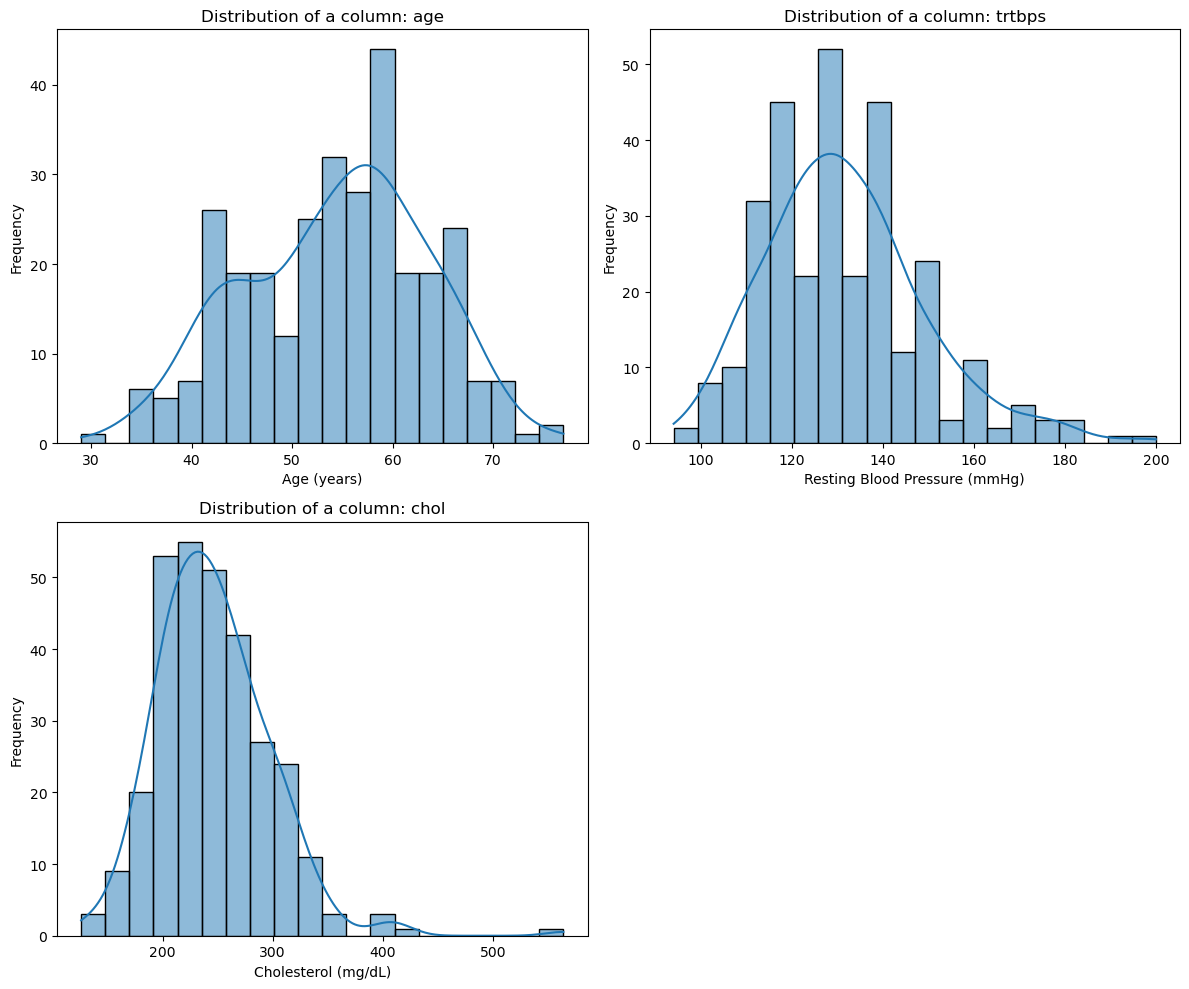

In [3]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore", category=FutureWarning)

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
sns.histplot(df["age"], kde=True, ax=axes[0, 0], bins=20)
axes[0, 0].set_title("Distribution of a column: age")
axes[0, 0].set_xlabel("Age (years)")
axes[0, 0].set_ylabel("Frequency")

sns.histplot(df["trtbps"], kde=True, ax=axes[0, 1], bins=20)
axes[0, 1].set_title("Distribution of a column: trtbps")
axes[0, 1].set_xlabel("Resting Blood Pressure (mmHg)")
axes[0, 1].set_ylabel("Frequency")

sns.histplot(df["chol"], kde=True, ax=axes[1, 0], bins=20)
axes[1, 0].set_title("Distribution of a column: chol")
axes[1, 0].set_xlabel("Cholesterol (mg/dL)")
axes[1, 0].set_ylabel("Frequency")

#Hide empty subplot in the bottom right grid
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


# Sub Task 3: Show Distribution of Different Categorical Variables (2 marks)

* Show distribution of values for sex, cp, fbs, restecg, exang and slope



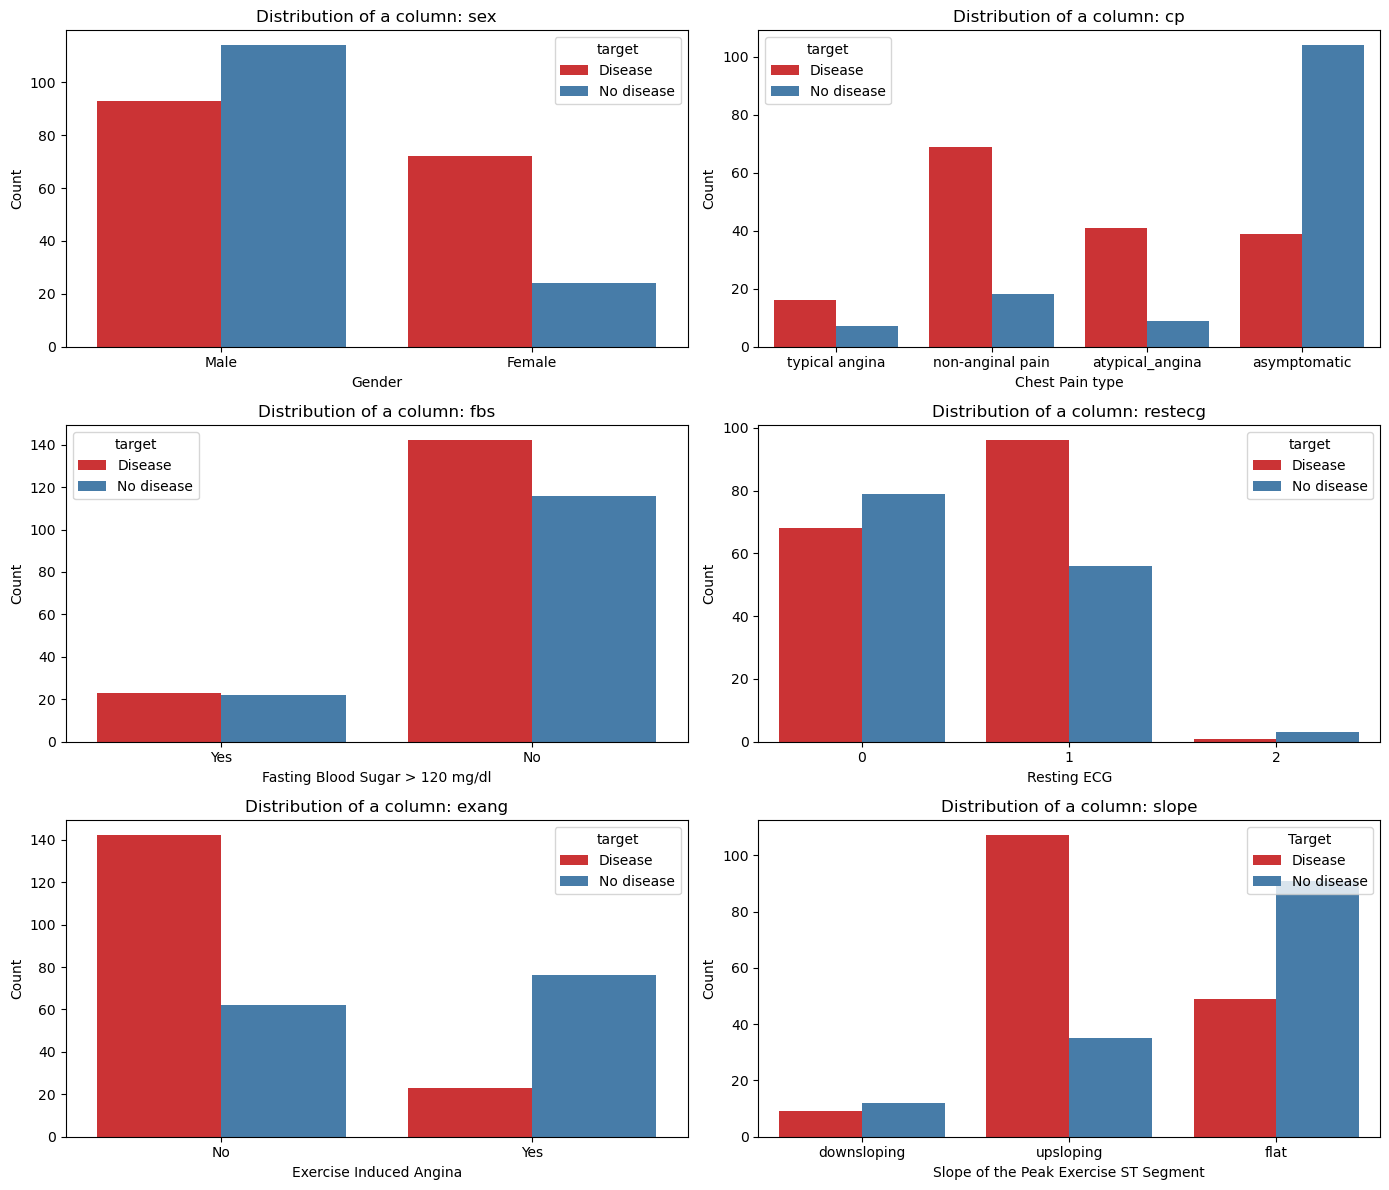

In [4]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

sns.countplot(data=df, x="sex", hue="target", ax=axes[0, 0], palette="Set1")
axes[0, 0].set_title("Distribution of a column: sex")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")

sns.countplot(data=df, x="cp", hue="target", ax=axes[0, 1], palette="Set1")
axes[0, 1].set_title("Distribution of a column: cp")
axes[0, 1].set_xlabel("Chest Pain type")
axes[0, 1].set_ylabel("Count")

sns.countplot(data=df, x="fbs", hue="target", ax=axes[1, 0], palette="Set1")
axes[1, 0].set_title("Distribution of a column: fbs")
axes[1, 0].set_xlabel("Fasting Blood Sugar > 120 mg/dl")
axes[1, 0].set_ylabel("Count")

sns.countplot(data=df, x="restecg", hue="target", ax=axes[1, 1], palette="Set1")
axes[1, 1].set_title("Distribution of a column: restecg")
axes[1, 1].set_xlabel("Resting ECG")
axes[1, 1].set_ylabel("Count")

sns.countplot(data=df, x="exang", hue="target", ax=axes[2, 0], palette="Set1")
axes[2, 0].set_title("Distribution of a column: exang")
axes[2, 0].set_xlabel("Exercise Induced Angina")
axes[2, 0].set_ylabel("Count")

sns.countplot(data=df, x="slope", hue="target", ax=axes[2, 1], palette= "Set1")
axes[2, 1].set_title("Distribution of a column: slope")
axes[2, 1].set_xlabel("Slope of the Peak Exercise ST Segment")
axes[2, 1].set_ylabel("Count")

plt.tight_layout()
plt.legend(title="Target", loc="upper right")
plt.show()


# Sub Task 4: Create Box Plots (2 marks)

Create box plots to visualise the distribution of cholesterol and age by gender for disease and no disease group. 

<Figure size 1500x1000 with 0 Axes>

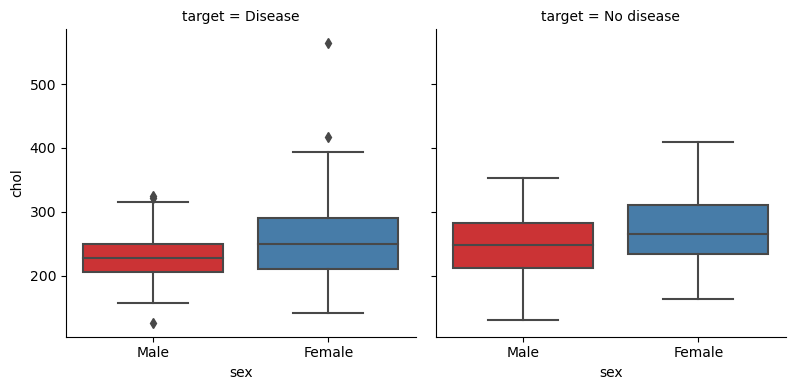

In [5]:
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col="target", height=4)
g.map_dataframe(sns.boxplot, "sex", "chol", order=["Male", "Female"], palette="Set1")

g.set_axis_labels("sex", "chol")
g.set_titles("target = {col_name}")
g.add_legend()
plt.show()

<Figure size 1500x1000 with 0 Axes>

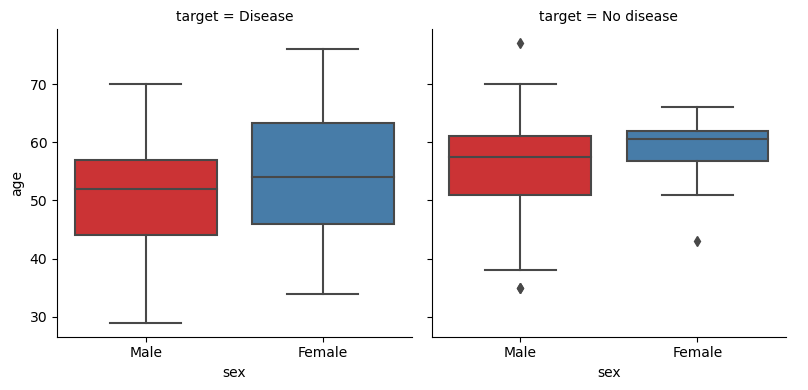

In [6]:
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col="target", height=4)
g.map_dataframe(sns.boxplot, "sex", "age", order=["Male", "Female"], palette="Set1")

g.set_axis_labels("sex", "age")
g.set_titles("target = {col_name}")
g.add_legend()

plt.show()

# Sub Task 5: Linear Relationship Plots (2 marks)

Use linear relationship plots to  understand the following:
1. The relationship between age and chol in each of the target, based on sex.
2. The relationship between age and chol in each of the sex, based on target.


<Figure size 1500x1000 with 0 Axes>

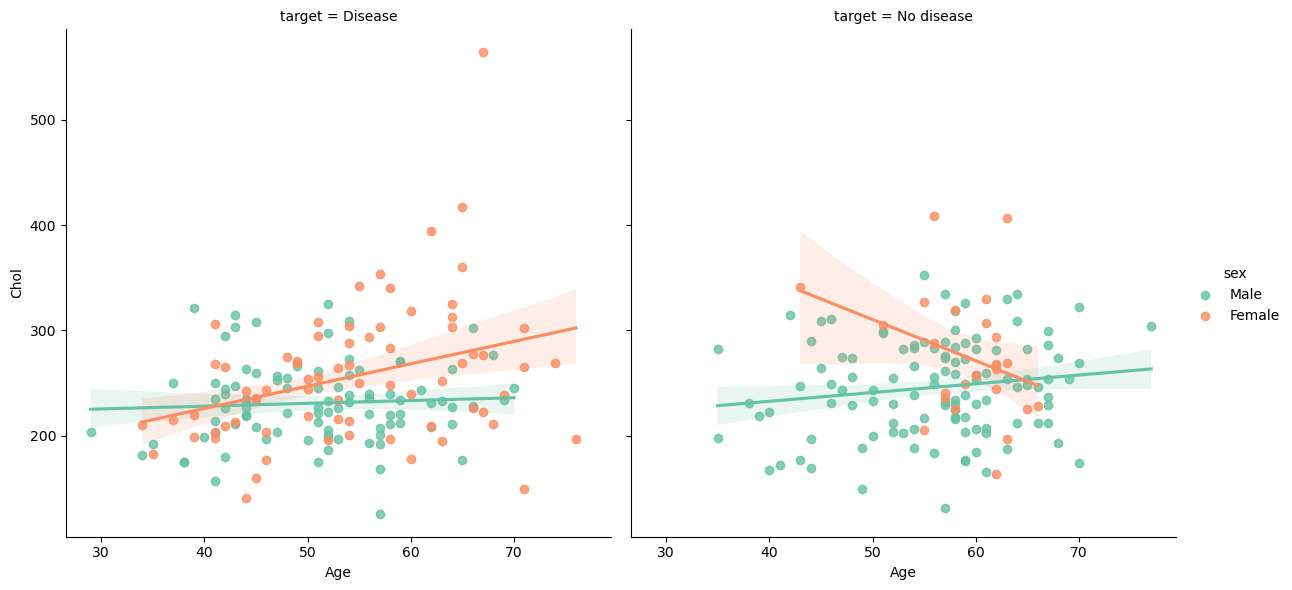

In [7]:
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col="target", hue="sex", height=6, palette="Set2")
g.map_dataframe(sns.regplot, "age", "chol", scatter=True, ci=90)

g.set_axis_labels("Age", "Chol")
g.set_titles("target = {col_name}")
g.add_legend()

plt.show()


<Figure size 1500x1000 with 0 Axes>

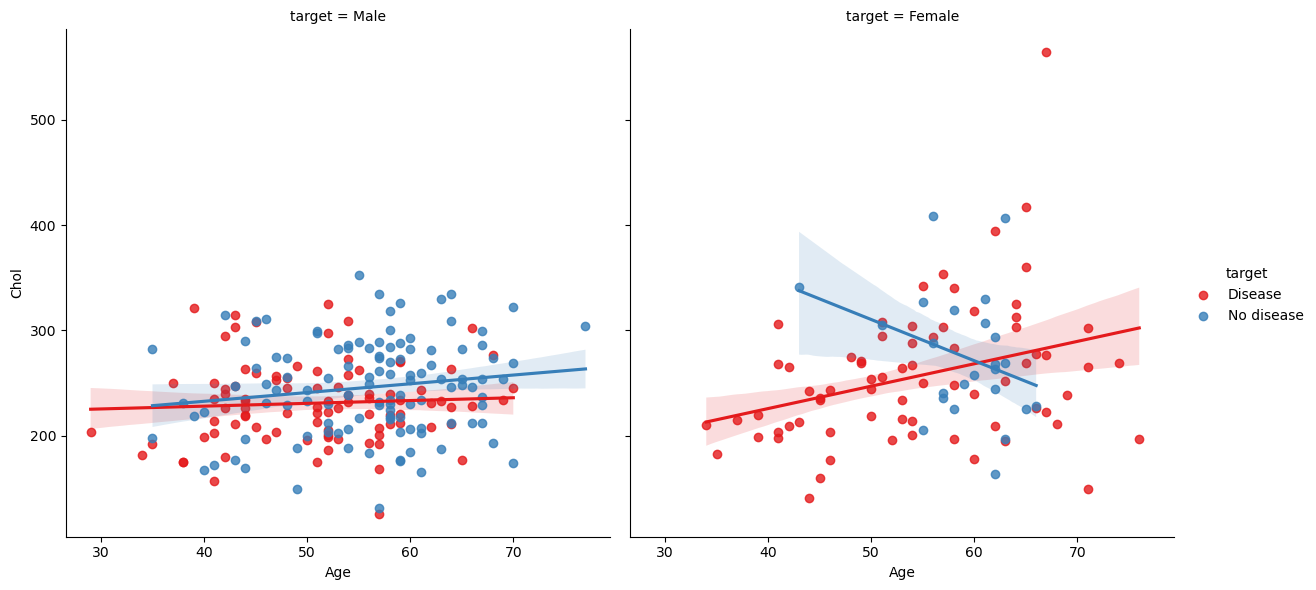

In [8]:
plt.figure(figsize=(15, 10))

g = sns.FacetGrid(df, col="sex", hue="target", height=6, palette="Set1")
g.map_dataframe(sns.regplot, "age", "chol", scatter=True, ci=90)

g.set_axis_labels("Age", "Chol")
g.set_titles("target = {col_name}")
g.add_legend()

plt.show()


# Sub Task 6: Create a Pairplot (1 mark)

Create a pairplot with the columns: age, chol, thal, oldpeak, trtbps.


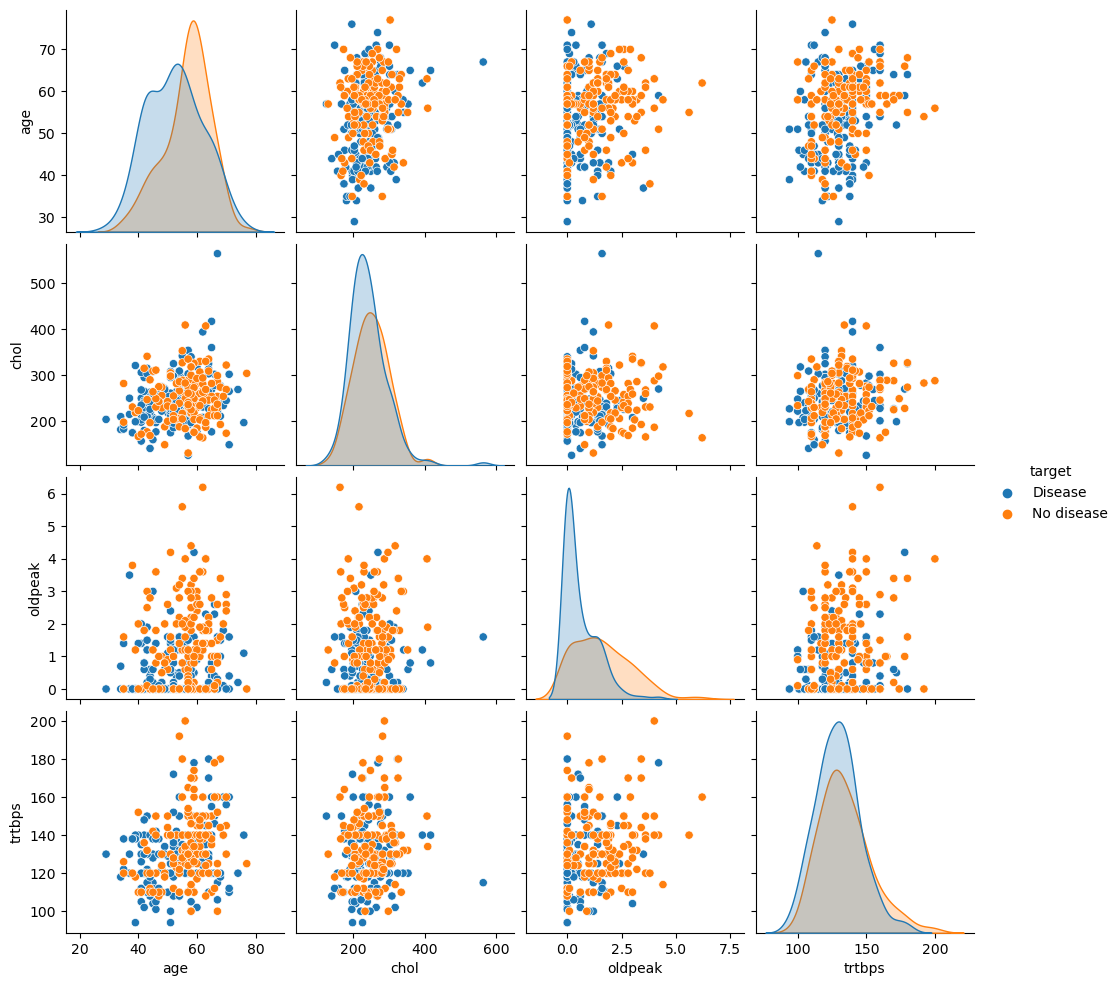

In [9]:
sns.pairplot(df[["age", "chol", "thal", "oldpeak", "trtbps", "target"]], hue="target")

plt.show()

# Sub Task 7: Create Heatmap (2 marks)

1 Using the 6 selected region DataFrame, create a heatmap of the correlation matrix created when using the .corr() method on the transactions dataframe. Use the 'BuPu' color palette.

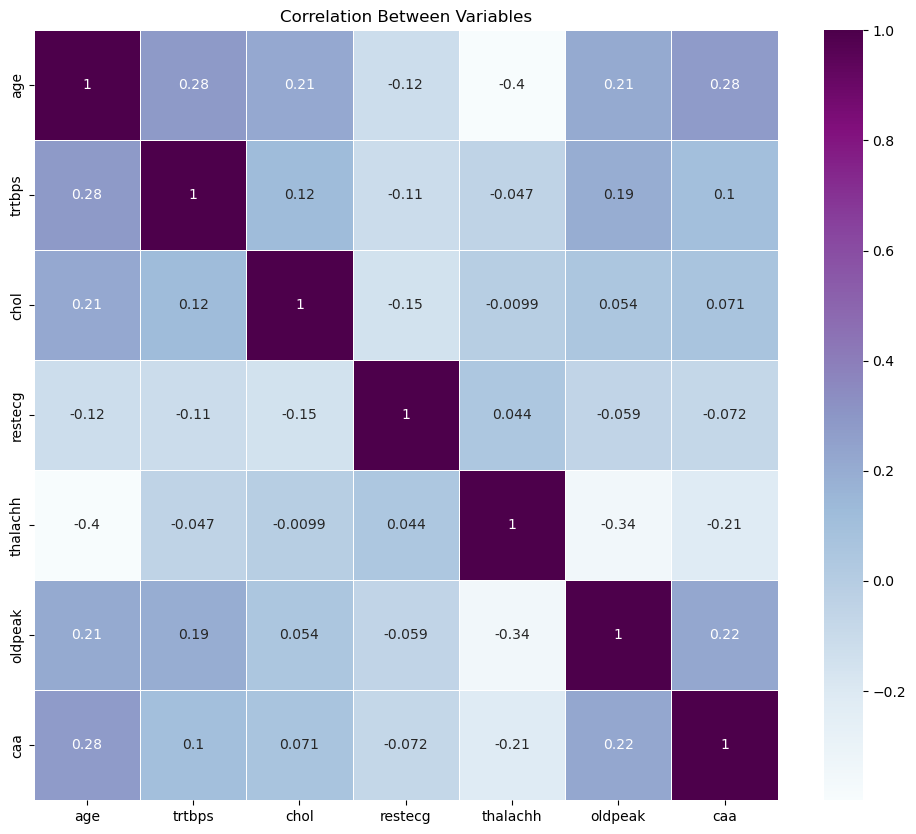

In [10]:
corr_matrix = df[["age", "trtbps", "chol", "restecg", "thalachh", "oldpeak", "caa"]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="BuPu", annot=True, linewidths=0.5, cbar=True)

plt.title("Correlation Between Variables")

plt.show()

# Sub Task 8: Conclusion (2 marks)

Summarise your data exploratory task in one or 2 paragraph(s)


According to insights obtained from data exploration in this notebook, there are some interesting insights. At a glance, with the distribution chart, we are able to identify that the average user in this dataset is a senior, with above average resting blood pressure at 130mmHg, which is classified as ['High Normal Blood Pressure'](https://www.healthhub.sg/a-z/diseases-and-conditions/understanding-blood-pressure-readings#:~:text=A%20healthy%20blood%20pressure%20reading%20should%20be%20lower%20than%20120/80%20mmHg). A peak at the count distributions relative to the 'target' feature also gives insight to the dataset. People who: are females, are symptomatic, have normal rest ecg, dont have exercise induced angina, and have upsloping of peak exercise ST regiment are more likely do have cardiac disease. Fasting Blood Sugar has no significant impact on disease presence.

The boxplots show that women have a higher average cholestrol amount than men, with much more extreme outliers than men. On the whole, both males and females in the dataset have higher average cholesterol levels, increasing by roughly 20 mg/dL in those with cardiac diseases. As high cholestrol is a [known cause for heart diseases](https://www.webmd.com/heart-disease/heart-disease-lower-cholesterol-risk#:~:text=for%20heart%20disease.-,How%20Does%20High%20Cholesterol%20Cause%20Heart%20Disease%3F,-When%20there%20is), and with similar observations in this dataset, we can assume that cholestrol directly contributes to the higher proportions of females having cardiac disease. The second boxplot also clearly shows that age plays a major role in cardiac disease observations. Scatterplot charts also have equal observations, though there is an interesting effect on cholestrol in combination with age particularly for women. It seems that women who have a combination of old age and higher cholestrol significantly increase their risk of cardiac disease compared to men, but when they have one but not the other (With more significance on age), their risk of cardiac disease actually becomes lower than mens.

Finally, the heatmap shows clearly that there is significant multicollinearity between maximum heart rate achieved and age, as well as ST depression induced by Exercise and maximum heart rate achieved. If this dataset were used in a predictive model, these multicollinearity issues should be taken into consideration. In conclusion, this exploratory data analysis supports [lowering your cholestrol by exercising and avoiding smoking](https://www.healthline.com/nutrition/how-to-lower-cholesterol#:~:text=10%20Natural%20Ways%20to%20Lower%20Your%20Cholesterol%20Levels). Incredibly, having an irregular resting ecg also reduces your risk for cardiac disease (Results should not be taken at face value, as there could be underlying hidden issues that bias higher disease rates for people with normal resting ecgs. Not much can be done to influence other features in this dataset.